In [55]:
import paddle
import numpy as np

num_sample = 10000
dtypes = 2
# sample = paddle.rand(num_sample, int, dtypes)
# sample = paddle.rand(num_sample, 2)
dim1 = paddle.to_tensor([num_sample], 'float32')
dim2 = paddle.to_tensor([num_sample], 'float32')
sample = paddle.rand(shape=[dim1, dim2, 2])
dist = paddle.norm(sample, p=np.inf, axis=0)

# dist = sample.norm(p=2, dim=1)
# ratio = (dist < 1).float().mean()
print('dist',dist)
ratio = float((dist < 1).mean())
print('ratio', ratio)
pi = ratio * 3

print('pi = {}'.format(pi))

dist Tensor(shape=[10000, 2], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[0.99999493, 0.99987930],
        [0.99988866, 0.99985600],
        [0.99984014, 0.99997723],
        ...,
        [0.99989522, 0.99985075],
        [0.99989563, 0.99995232],
        [0.99978977, 0.99997765]])
ratio 1.0
pi = 3.0


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


def MTKL(num=100000,n=100,pic_path='1000.png'):
    '''
    蒙特卡洛方法
    num:点的数量
    n:正方形边长
    '''
    r=n/2
    #从正方形左下角定点开始顺时针得到四个顶点的坐标
    x1,y1=0,0
    x2,y2=0,n
    x3,y3,=n,n
    x4,y4=n,0
    #圆心坐标
    xr,xy=int((x1+x4)/2),int((y1+y2)/2)
    print ('xr: ',xr)
    #绘制正方形区域
    fig=plt.figure()
    ax=fig.add_subplot(111)
    plt.plot([x1,y1],[x2,y2],color='g')
    plt.plot([x2,y2],[x3,y3],color='g')
    plt.plot([x3,y3],[x4,y4],color='g')
    plt.plot([x4,y4],[x1,y1],color='g')
    #随机丢点
    posX=np.random.uniform(0,n,num)
    posY=np.random.uniform(0,n,num)
    #计算点到圆心的距离
    dis=np.sqrt((posX-xr)**2 + (posY-xy)**2)
    #统计落在圆内点的数目
    res=sum(np.where(dis<=r,1,0))
    #计算pi的近似值（Monte Carlo:用统计值去近似真实值）
    pi=4*res/num
    plt.plot(posX,posY,'bo',markersize=0.4)
    plt.axis('equal') #防止图像变形
    circle=Circle(xy=(xr,xy),radius=r,alpha=0.5)
    ax.add_patch(circle)
    plt.title('PI: '+str(pi))
    plt.savefig(pic_path)
    plt.show()

In [ ]:
MTKL(num=10,n=100,pic_path='10.png')
MTKL(num=100,n=100,pic_path='100.png')
MTKL(num=1000,n=100,pic_path='1000.png')
MTKL(num=10000,n=100,pic_path='10000.png')
MTKL(num=100000,n=100,pic_path='100000.png')
MTKL(num=1000000,n=100,pic_path='1000000.png')
MTKL(num=10000000,n=100,pic_path='10000000.png')
MTKL(num=1000000000,n=100,pic_path='10000000.png')

In [2]:
import paddle
import paddle.nn as nn
from matplotlib import pyplot as plt

In [23]:
class MyModel(paddle.nn.Layer):
    def __init__(self, input_size=64, hidden_size=1):
        super(MyModel, self).__init__()
        self.fc1 = paddle.nn.Linear(hidden_size, input_size)
        self.fc2 = paddle.nn.Linear(input_size, hidden_size)
    def forward(self, x):
        o = self.fc1(x)
        o = self.act(o)
        out = self.fc2(o)
        return out
    def act(self, x):
        return paddle.tanh(x)

times 0 - lr 0.0001 -  loss: 2206.81396484375


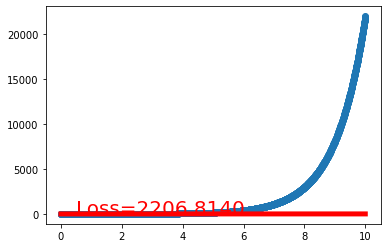

times 10000 - lr 0.0001 -  loss: 2109.982177734375


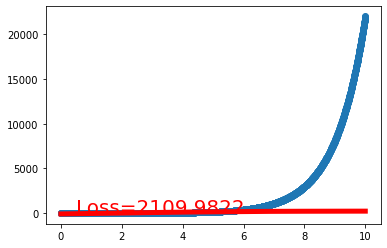

times 20000 - lr 0.0001 -  loss: 2006.079833984375


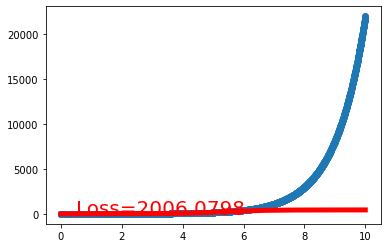

times 30000 - lr 0.0001 -  loss: 1922.3768310546875


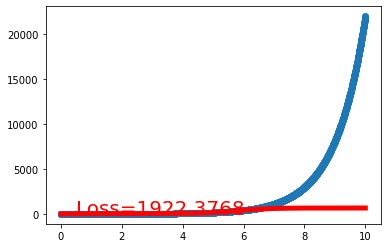

times 40000 - lr 0.0001 -  loss: 1853.7196044921875


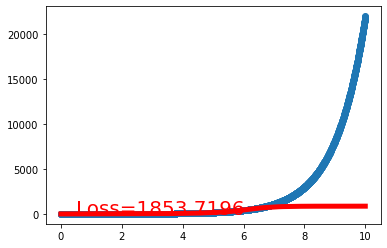

times 50000 - lr 0.0001 -  loss: 1793.822998046875


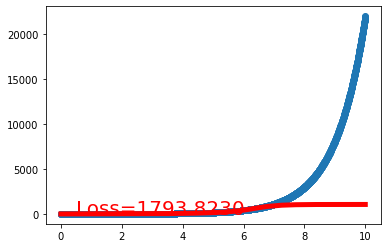

times 60000 - lr 0.0001 -  loss: 1739.8917236328125


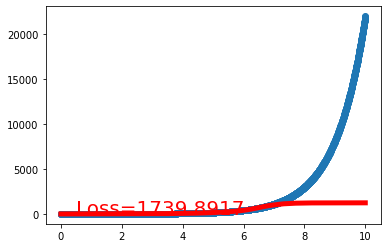

times 70000 - lr 0.0001 -  loss: 1691.6590576171875


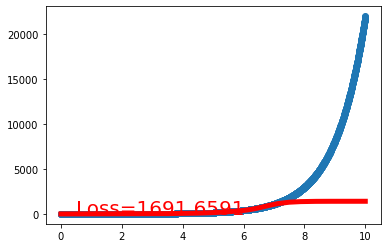

times 80000 - lr 0.0001 -  loss: 1647.3875732421875


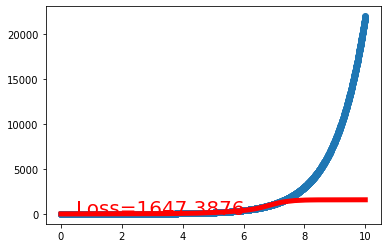

times 90000 - lr 0.0001 -  loss: 1605.4156494140625


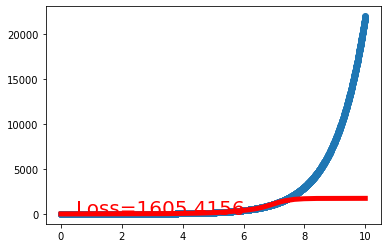

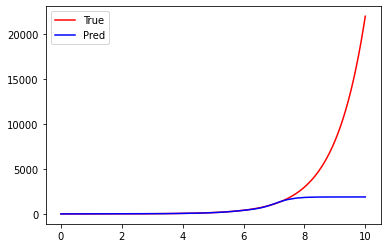

In [33]:
x = paddle.linspace(0,10,2000)
x_T = paddle.reshape(x, [2000, 1])
y = paddle.exp(x)
y_T = paddle.reshape(y, [2000, 1])
net = MyModel()

lr = 1e-4

# loss_fn = nn.MSELoss()
loss_fn = nn.L1Loss()
optimizer = paddle.optimizer.SGD(learning_rate=0.001, parameters=net.parameters())
# optimizer = paddle.optimizer.Adam(learning_rate=0.001, parameters=net.parameters())
# 开启图像互动模式
plt.ion()
for i in range(10 ** 5):
    # optimizer.zero_grad()
    optimizer.clear_grad()
    y_train = net(x_T)
    loss = loss_fn(y_train,y_T)
    if i % 10000 == 0:
        plt.cla()
        plt.scatter(x.detach().numpy(),y.detach().numpy())
        plt.plot(x.detach().numpy(), y_train.detach().numpy(), c='red',lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.item(), fontdict={'size': 20, 'color': 'red'})
        print(f'times {i} - lr {lr} -  loss: {loss.item()}')
        plt.pause(0.1)
    loss.backward()
    optimizer.step()
plt.ioff()
plt.show()
y2 = net(x_T)
plt.plot(x.detach().numpy(), y.detach().numpy(), c='red', label='True')
plt.plot(x.detach().numpy(), y2.detach().numpy(), c='blue', label='Pred')
plt.legend(loc='best')

plt.show()

# 解微分方程

In [13]:
class Net(paddle.nn.layer):
    def __init__(self, NL, NN):
        super(Net,self).__init__()
        self.input_layer = nn.Linear(1, NN)
        self.hidden_layer = nn.LayerList([nn.Linear(NN, NN) for i in range(NL)])
        self.output_layer = nn.Linear(NN, 1)

    def forward(self, x):
        o = self.act(self.input_layer(x))
        for i, li in enumerate(self.hidden_layer):
            o = self.act(li(o))
        out = self.output_layer(o)
        return out

TypeError: module() takes at most 2 arguments (3 given)